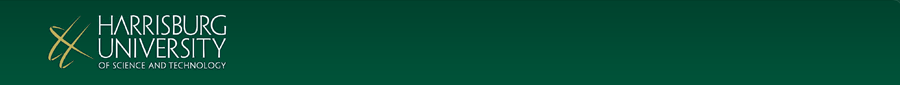
<br>
# CISC 340
# Introduction to Artificial Intelligence
## Lab Booklet #04
## Lab Title: Supervised Learning
***
### **Instructors**
### Brian Grey M.S.
### Chad Van Chu M.S.
***

# Objectives
#### Supervised learning is the "entry level" approach to machine learning. In order to effectively do supervised learning, we need a data set which has already been labeled for us and an approach we need to take. In this lab, we will be examing two different approaches to supervised learning. We will be implementing a probablisitic approach using the Naive Bayes classifier and a decision tree approch using the ID3 learning algorithm.

#### After completing this lab, you will be able to:

- __Understand how to run the calculations for a Naive Bayes classifier__
- __Understand how to implement the ID3 learning algorithm__
- __Be able to compare and contrast the output from each approach__

# Resources
#### While the lab will explain everything that you need to know, you may want to consult the following sources for additional knowledge:

- [https://en.wikipedia.org/wiki/Naive_Bayes_classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [https://en.wikipedia.org/wiki/ID3_algorithm](https://en.wikipedia.org/wiki/ID3_algorithm)

# Deliverables
#### For this lab, you will need to submit:

- Jupyter notebook files (.ipynb), named and coded as instructed. 
  - CISC 340 Lab 04 FA19.ipynb
  - Excel Spreadsheet if you choose to use it for PART 1.

# Instructions & Questions
We have provided a data set for this lab, `<your name> Lab04Data.xlsx`, that you will need to use for both parts of the lab. You can find this data file under the Lab 4 drop box on Moodle as a feedback file. Part 1 will involve running calculations in Excel. <b>Be sure NOT to alter the underlying data and be sure that your data is unaltered for Part 2.</b>

# <u>Part 1: Naive Bayes Classifier</u>

Naive bayes classifiers work with Bayes' Theorem. Where we can calculate the posterior probability of an event occuring given that some other event has occured from the likelihood, prior probability, and normalizing constant (evidence) of those events.

Bayes' theorem
--------------
$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

<br>Before constructing any model, let's begin by opening the data file provided to you in the instructions to familiarize ourselves with the data we are going to be working with. The class label in our datasets will always be the left most column, in this case **play**.

#### 1. What are the features that are present? How many records do you have present?

The features that are present in the records are Outlook, Temperature, Humidity, and Windy.The amount of records that I have is 99 total records with the 4 previously mentioned features.


#### 2. Using the dataset, calculate the probablities of each of your present features given the class and also the probablilty of just the class. You may do this using a program or using just the excel spreadsheet provided. Whichever method you choose, be sure that the probabilities are clearly shown in order to get credit.

In [2]:
import sys
import pylightxl as xl

'''
    Calculate the probabilites of each of my features given play being yes or no.
    Calculate the probability of just play    
'''
#def featProb():
# opens excel file from specified directory
file = xl.readxl(fn=r"C:/Users/sabom/Downloads/cisc340_fa20_11_Data.xlsx")

# Variable Declarations
# Note : I'm so sorry
yPlay=0
nPlay=0
ySun = 0
nSun =0
yRain = 0
nRain = 0
yOvercast = 0
nOvercast = 0
yCold = 0
nCold = 0
yMild = 0
nMild = 0
yHot = 0
nHot = 0
yNormal = 0
nNormal = 0
yHigh = 0
nHigh = 0
yWindy = 0
nWindy = 0
yNotWindy = 0
nNotWindy = 0

# Puts all data in col E (Play) into a list
play = file.ws(ws='Sheet').col(col=5)

# Iterates over list to find yes and no totals for probability calculations
for i in range(0, len(play)):
    if play[i] == 'Yes':
        yPlay +=1
    elif play[i] == 'No':
        nPlay +=1
        
# Variables for later calculations
yPlayp = yPlay/(len(play)-1)
nPlayp = nPlay/(len(play)-1)
                
# Overall for loop, will loop through every range to calculate probabilities of each feature
for num in range(1, 5):
    colData = file.ws(ws='Sheet').col(col=num)
    
    for i in range(0, len(colData)):
        match colData[i]:
            case "Sunny":
                if play[i] == 'Yes':
                    ySun +=1
                    sunY = ySun/yPlay
                if play[i] == 'No':
                    nSun +=1
                    sunN = nSun/nPlay
            
            case "Rainy":
                if play[i] == 'Yes':
                    yRain +=1
                    rainY = yRain/yPlay
                if play[i] == 'No':
                    nRain +=1
                    rainN = nRain/nPlay
            
            case "Overcast":
                if play[i] == 'Yes':
                    yOvercast +=1
                    overCastY = yOvercast/yPlay
                if play[i] == 'No':
                    nOvercast +=1
                    overCastN = nOvercast/nPlay
            
            case "Cold":
                if play[i] == 'Yes':
                    yCold+=1
                    coldY = yCold/yPlay
                if play[i] == 'No':
                    nCold+=1
                    coldN = nCold/nPlay
            
            case "Mild":
                if play[i] == 'Yes':
                    yMild+=1
                    mildY = yMild/yPlay
                if play[i] == 'No':
                    nMild+=1
                    mildN = nMild/nPlay
            
            case "Hot":
                if play[i] == 'Yes':
                    yHot+=1
                    hotY = yHot/yPlay
                if play[i] == 'No':
                    nHot+=1
                    hotN = nHot/nPlay
            
            case "Normal":
                if play[i] == 'Yes':
                    yNormal+=1
                    normalY = yNormal/yPlay
                if play[i] == 'No':
                    nNormal+=1
                    normalN = nNormal/nPlay
            
            case "High":
                if play[i] == 'Yes':
                    yHigh+=1
                    highY = yHigh/yPlay
                if play[i] == 'No':
                    nHigh+=1
                    highN = nHigh/nPlay
            
            case "Yes":
                if play[i] == 'Yes':
                    yWindy+=1
                    windyY = yWindy/yPlay
                if play[i] == 'No':
                    nWindy+=1
                    windyN = nWindy/nPlay
            
            case "No":
                if play[i] == 'Yes':
                    yNotWindy+=1
                    nWindyY = yNotWindy/yPlay
                if play[i] == 'No':
                    nNotWindy+=1
                    nWindyN = nNotWindy/nPlay

################################################################################
# Calculating Bayes Theorem with previous probabilities for P(X|Class)P(Class) #
################################################################################

# P(X|Play=Yes)P(Play=Yes)
pYes = sunY*rainY*overCastY*coldY*mildY*hotY*normalY*highY*windyY*nWindyY*yPlayp

# P(X|Play=No)P(Play=No)
pNo = sunN*rainN*overCastN*coldN*mildN*hotN*normalN*highN*windyN*nWindyN*nPlayp

# P(X) = P(X|Play=Yes)P(Play=Yes)+P(X|Play=No)P(Play=No)
pX = pYes+pNo

# P(Play=Yes|X)
playYesX = pYes/pX

# P(Play=No|X)
playNoX = pNo/pX

##################################################
################# Outputs ########################
##################################################
if True:
    # Outlook = Sunny
    print("Outlook is Sunny and Play is Yes: ", str(round(sunY*100,2)), "%")
    print("Outlook is Sunny and Play is No: ", str(round(sunN*100)), "%\n")
    # Outlook = Rainy
    print("Outlook is Rainy and Play is Yes: ", str(round(rainY*100,2)), "%")
    print("Outlook is Rainy and Play is No: ", str(round(rainN*100,2)), "%\n")
    # Outlook = Overcast 
    print("Outlook is Overcast and Play is Yes: ", str(round(overCastY*100,2)), "%")
    print("Outlook is Overcast and Play is No: ", str(round(overCastN*100,2)), "%\n")
    # Temperature = Cold
    print("Temperature is Cold and Play is Yes: ", str(round(coldY*100,2)), "%")
    print("Temperature is Cold and Play is No: ", str(round(coldN*100,2)), "%\n")
    # Temperature = Mild
    print("Temperature is Mild and Play is Yes: ", str(round(mildY*100,2)), "%")
    print("Temperature is Mild and Play is No: ", str(round(mildN*100,2)), "%\n")
    # Temperature = Hot
    print("Temperature is Hot and Play is Yes: ", str(round(hotY*100,2)), "%")
    print("Temperature is Hot and Play is No: ", str(round(hotN*100,2)), "%\n")
    # Humidity = Normal
    print("Humidity is Normal and Play is Yes: ", str(round(normalY*100,2)), "%")
    print("Humidity is Normal and Play is No: ", str(round(normalN*100,2)), "%\n")
    # Humidity = High
    print("Humidity is High and Play is Yes: ", str(round(highY*100,2)), "%")
    print("Humidity is High and Play is No: ", str(round(highN*100,2)), "%\n")
    # Windy = Yes
    print("It is Windy and Play is Yes: ", str(round(windyY*100,2)), "%")
    print("It is Windy and Play is No: ", str(round(windyN*100,2)), "%\n")
    # Windy = No
    print("It is not Windy and Play is Yes: ", str(round(nWindyY*100,2)), "%")
    print("It is not Windy and Play is No: ", str(round(nWindyN*100,2)), "%\n")
    # Probability of Playing
    print("Probability of Playing: ", str(round(playYesX*100,2)), "%")
    print("Probability of Not Playing: ", str(round(playNoX*100,2)), "%")



Outlook is Sunny and Play is Yes:  36.17 %
Outlook is Sunny and Play is No:  19 %

Outlook is Rainy and Play is Yes:  25.53 %
Outlook is Rainy and Play is No:  44.23 %

Outlook is Overcast and Play is Yes:  38.3 %
Outlook is Overcast and Play is No:  36.54 %

Temperature is Cold and Play is Yes:  21.28 %
Temperature is Cold and Play is No:  28.85 %

Temperature is Mild and Play is Yes:  51.06 %
Temperature is Mild and Play is No:  25.0 %

Temperature is Hot and Play is Yes:  27.66 %
Temperature is Hot and Play is No:  46.15 %

Humidity is Normal and Play is Yes:  48.94 %
Humidity is Normal and Play is No:  50.0 %

Humidity is High and Play is Yes:  51.06 %
Humidity is High and Play is No:  50.0 %

It is Windy and Play is Yes:  40.43 %
It is Windy and Play is No:  46.15 %

It is not Windy and Play is Yes:  59.57 %
It is not Windy and Play is No:  53.85 %

Probability of Playing:  47.36 %
Probability of Not Playing:  52.64 %


Output from code:

Outlook is Sunny and Play is Yes:  36.17 %
Outlook is Sunny and Play is No:  19 %

Outlook is Rainy and Play is Yes:  25.53 %
Outlook is Rainy and Play is No:  44.23 %

Outlook is Overcast and Play is Yes:  38.3 %
Outlook is Overcast and Play is No:  36.54 %

Temperature is Cold and Play is Yes:  21.28 %
Temperature is Cold and Play is No:  28.85 %

Temperature is Mild and Play is Yes:  51.06 %
Temperature is Mild and Play is No:  25.0 %

Temperature is Hot and Play is Yes:  27.66 %
Temperature is Hot and Play is No:  46.15 %

Humidity is Normal and Play is Yes:  48.94 %
Humidity is Normal and Play is No:  50.0 %

Humidity is High and Play is Yes:  51.06 %
Humidity is High and Play is No:  50.0 %

It is Windy and Play is Yes:  40.43 %
It is Windy and Play is No:  46.15 %

It is not Windy and Play is Yes:  59.57 %
It is not Windy and Play is No:  53.85 %

Probability of Playing:  47.36 %
Probability of Not Playing:  52.64 %

#### 3. Using your now "trained" model from Question 2, use those calculations to calculate what class the following new records would have. Show your calculations. (Be sure to not recalculate your probabilities, you already did that in part 2):

| Outlook | Temperature | Humidity | Windy | Play |
| --- | --- | --- | --- | --- |
| Sunny | Mild | Normal | False | --- |
| Overcast | Hot | Normal | True | --- |
| Rainy | Hot | High | True | --- |


<br><font color='red'>Note:</font> Feel free to edit this Markdown and replace the "---" with the actual class. But also remember you MUST include your calculations through provided code OR spreadsheet.

In [7]:
def newRecordLineCalc(Outlook, Temp, Humidity, Windy, Playp):
    # P(X|Play=Yes/No)P(Play=Yes/No)
    valueN = Outlook*Temp*Humidity*Windy*Playp
    return valueN
    
def BayesCalc(valueY, valueN):
    # P(X) = P(X|Play=Yes)P(Play=Yes)+P(X|Play=No)P(Play=No)
    valueZ = valueY+valueN
    
    # P(Play=Yes|X)
    lineYes = valueY/valueZ
    
    # P(Play=No|X)
    lineNo = valueN/valueZ

    if lineYes>lineNo:
        return True
    elif lineNo>lineYes:
        return False
    
'''Line 1'''
l1Yes = newRecordLineCalc(sunY, mildY, normalY, nWindyY, yPlayp)
l1No = newRecordLineCalc(sunN, mildN, normalN, nWindyN, nPlayp)
if BayesCalc(l1Yes, l1No) is True:
    print("The class label of line 1 should be yes")
else:
    print("The class label of line 1 should be no")

'''Line 2'''
l2Yes = newRecordLineCalc(overCastY, hotY, normalY, windyY, yPlayp)
l2No = newRecordLineCalc(overCastN, hotN, normalN, windyN, nPlayp)
if BayesCalc(l2Yes, l2No) is True:
    print("The class label of line 2 should be yes")
else:
    print("The class label of line 2 should be no")

'''Line 3'''
l3Yes = newRecordLineCalc(rainY, hotY, highY, windyY, yPlayp)
l3No = newRecordLineCalc(rainN, hotN, highN, windyN, nPlayp)
if BayesCalc(l3Yes, l3No) is True:
    print("The class label of line 3 should be yes")
else:
    print("The class label of line 3 should be no")

The class label of line 1 should be yes
The class label of line 2 should be no
The class label of line 3 should be no


Output since for some reason it won't transfer over from last question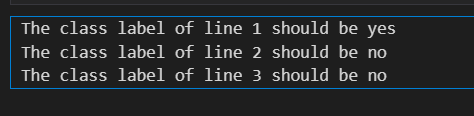

# <u>Part 2: ID3 Decision Tree</u>


#### 4. Create an object called `ID3` that will contain your trained classifier. This object should have 3 publicly visible methods:
- __`train(rawData)`: Method which takes the raw data as a parameter and trains the decision tree.__
- __`classify(record)`: Method which takes a record which the method will classify. It should return this classification.__
- __`displayTree()`: Method which displays to screen the decision tree which was trained.__

#### You have flexibility within your code on how things are passed or displayed, but be sure to meet the design requirements. Private helper methods may be declared but should be declared and commented appropriately.

In [ ]:
import math

###########################################
# Calculations for use in ID3 Calculation #
###########################################
# Once again I'm so sorry
# Each of these are the total amount of times that a value appears in the dataset
# This is assuming that the previous questions and their code is in the same file
tSun = ySun + nSun
tRain = yRain + nRain
tOvercast = yOvercast + nOvercast
tCold = yCold + nCold
tMild = yMild + nMild
tHot = yHot + nHot
tNormal = yNormal + nNormal 
tHigh = yHigh + nHigh
tWindy = yWindy + nWindy
tNotWindy = yNotWindy + nNotWindy 

# Puts all values into array for parameter purposes
total_values = [tSun, tRain, tOvercast, tCold, tMild, tHot, tNormal, tHigh, tWindy, tNotWindy]

# Puts all of the probabilities of each case into a list for parameter
prob_list = [sunY, sunN, rainY, rainN, overCastY, overCastN, coldY, 
             coldN, mildY, mildN, hotY, hotN, normalY, normalN,
             highY, highN, windyY, windyN, nWindyY, nWindyN]

# List of features for calculation
featureList = ["Outlook", "Temperature", "Humidity", "Windy"]

class ID3:
    def __init__(self, train, classification, displayTree, entropy, infoGain):
        self.tree = None
        self.train = train
        self.classification = classification
        self._entropy = entropy
        self._information_gain = infoGain
    
    def train(self, rawData):
        # Tree Building Process
        self.tree = self._buildTree(rawData)
    
    def classify(self, record):
        # classify yes or no for a test case
        # Return the probability 
        return self._classify_record(record, self.tree)
    
    def displayTree(root):
        # Breadth first Search
        queue = [root]
        tree = []
        while queue:
            node = queue.pop(0)
            tree.append(node.get_value())
        
        return tree
        
    
    def _entropyCalc(self, data):
        # data is a list of all the probabilities of each case (sunY, sunN, etc.)
        
        entropy = 0
        for prob in data:
            if prob !=0:
                entropy -= data[prob]*math.log2(data[prob])
        
        return entropy
    
    def _information_gain_calc(self, prob_list, featureNum):
        # total_values is the list of total_values defined before the class
        # entropy is the list of all entropys of every case
        # featureList is a list of all features on dataset
        # featureNum is a integer to select which feature is being calculated.
        
        total_entropy = self._entropyCalc(prob_list)
                
        
        # Determines based on the feature, what values it pulls from the dataset
        if featureNum == 1:
            # Outlook
            # 0&1 are sunY & sunN
            # 2&3 are rainY & rainN
            # 4&5 are overcastY & overcastN
            valueList = prob_list[0,1,2,3,4,5]
        elif featureNum == 2:
            # Temperature
            # 6&7 are coldY & coldN
            # 8&9 are mildY & mildN
            # 10&11 are hotY & hotN
            valueList = prob_list[6,7,8,9,10,11]
        elif featureNum == 3:
            # Humidity
            # 12&13 are normalY & normalN
            # 14&15 are highY & highN
            valueList = prob_list[12,13,14,15]
        elif featureNum == 4:
            # Windy
            # 16&17 are windyY & windyN
            # 18&19 are nWindyY & nWindyN
            valueList = prob_list[16,17,18,19]
            
        feature_entropy = self._entropyCalc(prob_list)
        
        informationGain = total_entropy - feature_entropy
        
        return informationGain
        
    
    def _calculate_probability(self, value1, value2):
        # P(X) = P(X|Play=Yes)P(Play=Yes)+P(X|Play=No)P(Play=No)
        valueZ = value1+value2
        
        # P(Play=Yes|X)
        lineYes = value1/valueZ
        
        # P(Play=No|X)
        lineNo = value2/valueZ

        if lineYes>lineNo:
            return True
        elif lineNo>lineYes:
            return False
    
    def _buildTree(self, data):
        pass
        
         
    def _classify_record(self, record, tree):
        if tree.get_classification() is not None:
            return tree.get_classification()
        
        value = record[tree.get_value()]
        next_node = None
        for child in tree.get_children():
            if child.get_value() == value:
                next_node = child
                break
            
        if next_node is None:
            return None
            
        return self._classify_record(record, next_node)
        

class Node:
    def __init__(self):
        self.value = None
        self.next = None
        self.children = []
        self.classification = None
        
    def get_value(self):
        return self.value
    def get_next(self):
        return self.next
    def get_children(self):
        return self.children
    def get_classification(self):
        return self.classification
    
    def set_value(self, value):
        self.value = value
    def set_next(self, next):
        self.next = next
    def set_child(self, child):
        self.children.append(child)
    def set_classification(self, classification):
        self.classification = classification

#### 5. Provide code that runs the training algorithm for training based on your provided data. Use the records from Question 3 to classify each record. Finally, output your decision tree.

In [ ]:
#Write code here

# <u>Part 3: Analysis</u>


#### 6.	Do your calculations for the Naive Bayes classifier result in the same classifier as the ID3 Decision Tree generates? If they differ, why do you think that is? If they are the same, do you think that they would always be? Explain your answer in detail.

<font color='red'>Type answer here!</font>